In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
resultados = pd.read_csv('dados/results.csv')
penaltis = pd.read_csv('dados/shootouts.csv')
marcadores = pd.read_csv('dados/goalscorers.csv')

In [4]:
resultados.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
resultados.columns = ['ano','casa','visitante','gols_casa','gols_visitante','torneio','cidade','pais','neutro']

In [6]:
resultados['ano'] = pd.to_datetime(resultados['ano'])
resultados['ano'] = resultados['ano'].dt.year

In [7]:
resultados.isnull().sum()

ano               0
casa              0
visitante         0
gols_casa         0
gols_visitante    0
torneio           0
cidade            0
pais              0
neutro            0
dtype: int64

In [8]:
penaltis.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [9]:
penaltis.columns = ['ano','casa','visitante','vencedor','primeiro_batedor']

In [10]:
penaltis['ano'] = pd.to_datetime(penaltis['ano'])
penaltis['ano'] = penaltis['ano'].dt.year

In [11]:
penaltis.isnull().sum()

ano                   0
casa                  0
visitante             0
vencedor              0
primeiro_batedor    476
dtype: int64

In [12]:
penaltis.shape

(562, 5)

In [13]:
marcadores.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [14]:
marcadores.shape

(43189, 8)

In [15]:
marcadores.columns = ['ano','casa','visitante','time','marcador','minuto','gol_contra','penalti']

In [16]:
marcadores['ano'] = pd.to_datetime(marcadores['ano'])
marcadores['ano'] = marcadores['ano'].dt.year

In [17]:
marcadores.isnull().sum()

ano             0
casa            0
visitante       0
time            0
marcador       50
minuto        260
gol_contra      2
penalti         2
dtype: int64

In [18]:
marcadores.loc[marcadores['marcador'].isnull()]

,ano,casa,visitante,time,marcador,minuto,gol_contra,penalti
8108,1980,Vanuatu,Papua New Guinea,Papua New Guinea,NaN,NaN,False,False
8109,1980,Vanuatu,Papua New Guinea,Papua New Guinea,NaN,NaN,False,False
8110,1980,Vanuatu,Papua New Guinea,Papua New Guinea,NaN,NaN,False,False
8111,1980,Vanuatu,Papua New Guinea,Papua New Guinea,NaN,NaN,False,False
8112,1980,Vanuatu,Papua New Guinea,Vanuatu,NaN,NaN,False,False
8113,1980,Vanuatu,Papua New Guinea,Vanuatu,NaN,NaN,False,False
8114,1980,Vanuatu,Papua New Guinea,Vanuatu,NaN,NaN,False,False
8115,1980,Fiji,Solomon Islands,Fiji,NaN,NaN,False,False
8116,1980,Fiji,Solomon Islands,Fiji,NaN,NaN,False,False
8117,1980,Fiji,Solomon Islands,Fiji,NaN,NaN,False,False


In [19]:
marcadores.dropna(subset=['marcador','penalti','gol_contra'],inplace=True)

In [20]:
media = marcadores['minuto'].mean().round()
media

50.0

In [21]:
marcadores.fillna(media,inplace=True)

-------------------------------------------------------------------------------------->

In [22]:
resultados['vencedor'] = resultados.apply(lambda row: row['casa'] if row['gols_casa'] > row['gols_visitante'] else (row['visitante'] if row['gols_visitante'] > row['gols_casa'] else 'empate'), axis=1)
resultados['vencedor_m'] = resultados.apply(lambda row: 'casa' if row['vencedor'] == row['casa'] else ('visitante' if row['vencedor'] == row['visitante'] else 'empate'), axis=1)

resultados

,ano,casa,visitante,gols_casa,gols_visitante,torneio,cidade,pais,neutro,vencedor,vencedor_m
0,1872,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,empate,empate
1,1873,England,Scotland,4,2,Friendly,London,England,False,England,casa
2,1874,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,casa
3,1875,England,Scotland,2,2,Friendly,London,England,False,empate,empate
4,1876,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,casa
...,...,...,...,...,...,...,...,...,...,...,...
45310,2023,Wales,Turkey,1,1,UEFA Euro qualification,Cardiff,Wales,False,empate,empate
45311,2023,Croatia,Armenia,1,0,UEFA Euro qualification,Zagreb,Croatia,False,Croatia,casa
45312,2023,Andorra,Israel,0,2,UEFA Euro qualification,Andorra la Vella,Andorra,False,Israel,visitante
45313,2023,Kosovo,Belarus,0,1,UEFA Euro qualification,Pristina,Kosovo,False,Belarus,visitante


In [23]:
resultados['vencedor'].mode()

0    empate
Name: vencedor, dtype: object

In [24]:
resultados[resultados['vencedor']!='empate']['vencedor'].mode()

0    Brazil
Name: vencedor, dtype: object

In [25]:
resultados['vencedor'].value_counts().idxmin()

'Romani people'

In [26]:
resultados['total_gols'] = resultados['gols_casa'] + resultados['gols_visitante']

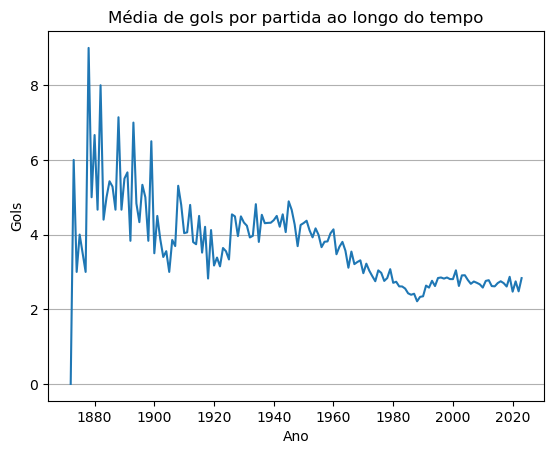

In [36]:
anos_media = resultados.groupby('ano',as_index=False)['total_gols'].mean()
plt.plot(anos_media['ano'], anos_media['total_gols']) 
plt.xlabel("Ano") 
plt.ylabel("Gols") 
plt.title("Média de gols por partida ao longo do tempo") 
plt.grid(axis = 'y')
plt.show()

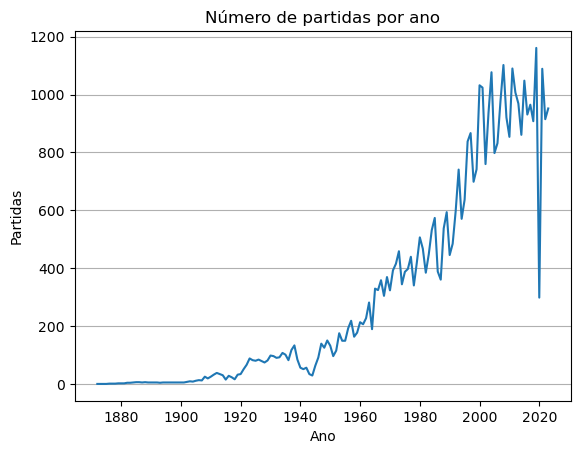

In [37]:
partida_ano = resultados.groupby('ano',as_index=False).size()
plt.plot(partida_ano['ano'], partida_ano['size']) 
plt.xlabel("Ano") 
plt.ylabel("Partidas") 
plt.title("Número de partidas por ano") 
plt.grid(axis = 'y')
plt.show()


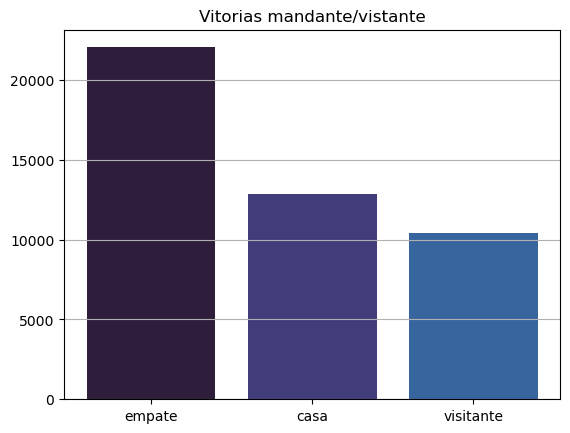

In [38]:
cores = sns.color_palette(palette='mako')
plt.bar(resultados['vencedor_m'].unique(),resultados['vencedor_m'].value_counts(),color=cores)
plt.title('Vitorias mandante/vistante')

plt.show()